In [1]:
import tensorflow as tf
import numpy as np

In [2]:
num_classes = 10
img_rows, img_cols, img_ch = 28, 28, 1
input_shape = (img_rows, img_cols, img_ch)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)

In [3]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

In [1]:
from IPython.display import Image

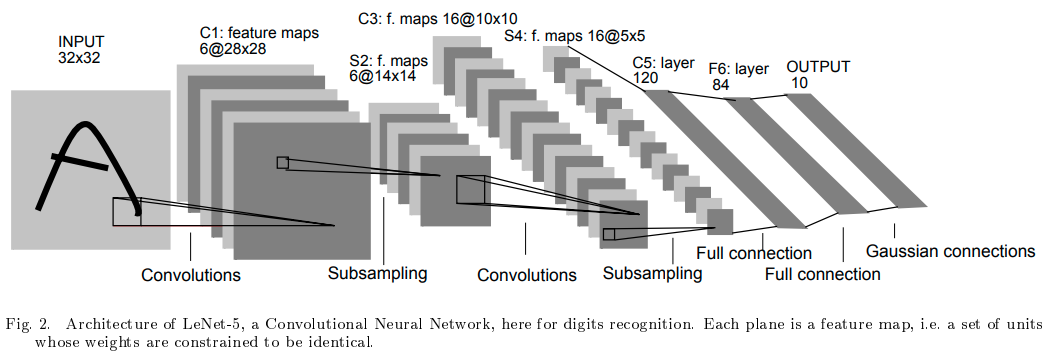

In [2]:
Image('image/lenet5_fig_2.png')

In [4]:
# class version
class LeNet5(Model):
    
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        
        self.conv1 = Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu')
        self.conv2 = Conv2D(16, kernel_size=(5, 5), activation='relu')
        self.avg_pool = AveragePooling2D(pool_size=(2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(120, activation='relu')
        self.dense2 = Dense(84, activation='relu')
        self.dense3 = Dense(num_classes, activation='softmax')
        
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.avg_pool(x)
        x = self.conv2(x)
        x = self.avg_pool(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [5]:
# function version
def LeNet5(input_shape, num_classes):
    input = Input(shape=input_shape, name='Input')
    
    x = Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu')(input)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
    x = AveragePooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    
    x = Dense(120, activation='relu')(x)
    x = Dense(84, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input, outputs=output)
    
    return model

In [6]:
batch_input_shape = tf.TensorShape((None, *input_shape))

In [10]:
# class version
model = LeNet5(num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "le_net5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           multiple                  156       
                                                                 
 conv2d_3 (Conv2D)           multiple                  2416      
                                                                 
 average_pooling2d_2 (Averag  multiple                 0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  48120     
                                                                 
 dense_4 (Dense)             multiple                  10164     
                                                           

In [7]:
# function version
model = LeNet5(input_shape, num_classes)
model.build(input_shape=batch_input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [8]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=32, epochs=80,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/80
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6563 - accuracy: 0.8058 - val_loss: 0.2263 - val_accuracy: 0.9303
Epoch 2/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2017 - accuracy: 0.9383 - val_loss: 0.1484 - val_accuracy: 0.9541
Epoch 3/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1414 - accuracy: 0.9564 - val_loss: 0.1416 - val_accuracy: 0.9558
Epoch 4/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.0831 - val_accuracy: 0.9733
Epoch 5/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0907 - accuracy: 0.9719 - val_loss: 0.0805 - val_accuracy: 0.9736
Epoch 6/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9758 - val_loss: 0.0680 - val_accuracy: 0.9788
Epoch 7/80
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0739 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.9872


[0.04362870752811432, 0.9872000217437744]

In [11]:
y_pred = list(map(np.argmax, model.predict(x_test)))

In [12]:
print(y_pred[0])

7


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

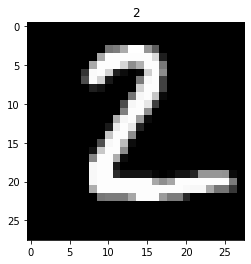

In [15]:
plt.title(y_pred[1])
plt.imshow(x_test[1], 'gray')
plt.show()